# Modelling Transmission Response of ITO [Pump Probe] (Y-Models)

## 1. Introduction
This file contains the different models being used to attempt to successfully model a correct Transmission Response of Indium Tin Oxide upon a Pump-Probe laser setup. To look at the known relationships and the background relations, consult the Relations notebook. 

Code is stored in separate python files and then loaded in. This is to tidy up the code as well as to reduce file size on this notebook. Note that laser parameters are not transferred between this and the relations file, so be careful on that.

### File Input Warnings

Experimental data must not be normalized prior to insertion into the notebook. This is because the notebook will find the maximum to normalize the model outputs. The experimental data will be normalized alongside the model outputs.

Experimental data must be in the range (0, 1). This will require the open-scan transmission value. To reiterate, the experimental maximum should not be 1. That operation is performed in this notebook. The open-scan transmission value in arbitrary units should be unity.

Experimental data file format is INTENSITY.WAVELENGTH.PULSE.ANGLE.THICKNESS.NAME.txt. This will be checked against model inputs, so make sure it is correct. Otherwise, [in this cell](#check), change function parameter CHECK=1 to CHECK=0 to skip checking these. The .NAME. is not required but will still work with the code.

## 2. Module Import and Setup
<a id='top'></a>

In [1]:
from IDRIM.constants import *
from IDRIM.relations import *
from IDRIM.graph import *
from IDRIM.commons import *
from IDRIM.checks import *
from IDRIM.modcom import *
from IDRIM.genesis import *
from IDRIM.ymodcom import *
from IDRIM.file import *
import IDRIM.models.y1 as y
from numpy import inf

# 3. Model Inputs

Insert values as desired.

In [2]:
EXPERIMENT_PATH = "data/exp/250.1240.104.30.407.txt"
#Format is INTENSITY.WAVELENGTH.PULSE.ANGLE.THICKNESS
Parameters={'wavelength':1240*nm, 'pulse':104e-15, 'angle':30, 'thick':[inf, 407, 1100000, inf], 'Res':100}
I = 200 #Gwcm2

In [3]:
i = IntensityArrayIndex(I, IntRes=Parameters['Res']) 

In [4]:
bEnableY0  = 1  # Simulate Model Y-0.
bEnableY2  = 1  # Simulate Model Y-2. Electron Heat Capacity Change
bEnableY3  = 1  # Simulate Model Y-3. Phonon Heat Capacity Change
bEnableY5  = 0  # Simulate Model Y-5. Power Function is just wrong
bEnableY7  = 0  # Simulate Model Y-7. Doesn't change anything. Which is good, what was expected
bEnableY11 = 1 # Simulate Model Y-11. Phonon decay term (Tom's)
bEnableY13 = 0 # Simulate Model Y-13. Temperature dependent Drude scattering coefficient.

bEnableExperiment = 1 # Enable Experiment data plotting

Model Input Feedback
<a id='check'></a>

In [5]:
if bEnableExperiment == 1:
    ExperimentParamPrinter(EXPERIMENT_PATH, I, Parameters, CHECK=0)

Experimental Intensity: 250 Gw/cm²
Model Intensity: 200 Gw/cm² 

Experimental Wavelength: 1240 nm
Model Wavelength: 1240 nm

Experimental Pulse: 104 fs
Model Pulse: 104.0 fs

Experimental Angle: 30 degrees
Model Angle: 30 degrees

Experimental Sample Thickness: 407 nm
Model Sample Thickness: 407 nm

Experimental parameters and model input have not been checked. Please perform this manually.


In [6]:
mu_array, Cp_array, Ce_array, wp_array, RI_array, Fit = Regeneration(Parameters, OVERRIDE=0)
Relations_dict = {'mu':mu_array, 'Cp':Cp_array, 'wp':wp_array, 'Ce':Ce_array, 'RI':RI_array, 'Fit':Fit}
print("Fit Parameter is",Fit)

No change in parameters detected.
Not solving for Chemical Potential. Loading from previously saved data.
Mu Loaded.
Not solving Phonon Heat Capacity. Loading from saved file.
Phonon Heat Capacity loaded.
Not solving Electron Heat Capacity. Loading from saved file.
Electron Heat Capacity loaded.
Loading Plasma Frequency from saved file.
Loaded Plasma Frequency.
Loading Refractive Index from saved file.
Loaded Refractive Index


REGENERATION COMPLETE.
Fit Parameter is 0.16269738991347643


In [7]:
Y = {} #Set to 0 or 1. Multiple can be used at once.
Y.update({'Y2': 0}) #Electron Heat Capacity modification
Y.update({'Y3': 0}) #Phonon Heat Capacity modification
Y.update({'Y5': 0}) #Power function modification
Y.update({'Y7': 0}) #Phonon relaxation modification
Y.update({'Y11': 0}) #Phonon decay term
Y.update({'Y13': 0}) #Temperature Dependent Drude Scattering Coefficient
#DO NOT change these! These just set it up.

## 4. Model Index
<a id='index'></a>

[Model Y-0](#y0)

[Model Y-2](#y2)

[Model Y-3](#y3)

[Model Y-5](#y5)

[Model Y-7](#y7)

[Model Y-11](#y11)

[Model Y-13](#y13)

[Experiment Data](#exp)

[Comparisons](#compare)

[Return to Index](#index)
<a id='y0'></a>
### Model Y-0: Base

In [8]:
if bEnableY0 == 1:
    Y0 = y.Core(I, Relations_dict, Parameters, Y)

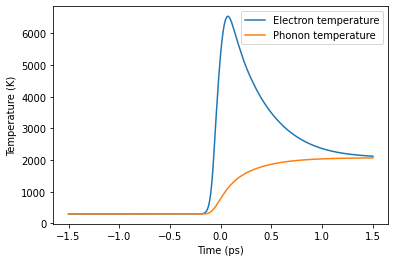

In [9]:
if bEnableY0 == 1:
    Graphing_TimeVSTemperature(Y0['Te'], Y0['Tp'])

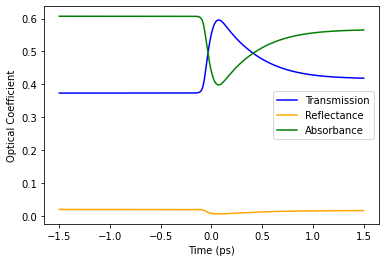

In [10]:
if bEnableY0 == 1:
    Graphing_TimeVSCoefficients(Y0['Te'], Y0['T'], Y0['R'], Y0['A'])

[Return to Index](#index)
<a id='y2'></a>
### Model Y-2: Electron Heat Capacity

In [11]:
if bEnableY2 == 1:
    Y.update({'Y2': 1}) #Electron Heat Capacity modification
    Y2 = y.Core(I, Relations_dict, Parameters, Y)

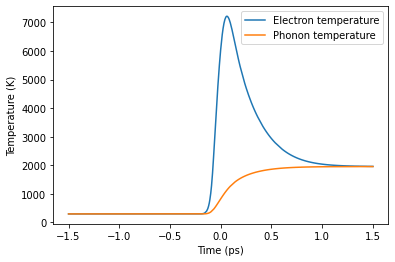

In [12]:
if bEnableY2 == 1:
    Graphing_TimeVSTemperature(Y2['Te'], Y2['Tp'])

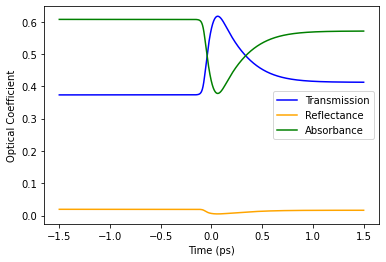

In [13]:
if bEnableY2 == 1:
    Graphing_TimeVSCoefficients(Y2['Te'], Y2['T'], Y2['R'], Y2['A'])

[Return to Index](#index)
<a id='y3'></a>
### Model Y-3: Phonon Heat Capacity Change

In [14]:
if bEnableY3 == 1:
    Y.update({'Y2':0})
    Y.update({'Y3':1})
    Y3 = y.Core(I, Relations_dict, Parameters, Y)

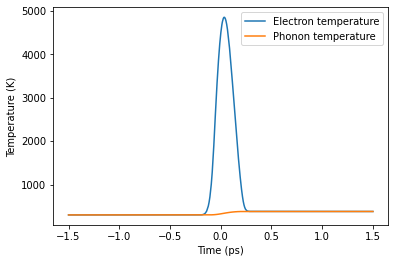

In [15]:
if bEnableY3 == 1:
    Graphing_TimeVSTemperature(Y3['Te'], Y3['Tp'])

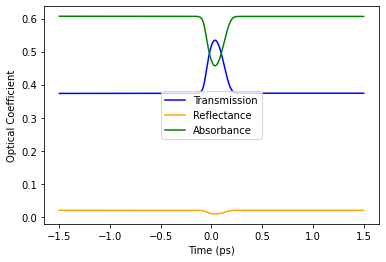

In [16]:
if bEnableY3 == 1:
    Graphing_TimeVSCoefficients(Y3['Te'], Y3['T'], Y3['R'], Y3['A'])

[Return to Index](#index)
<a id='y5'></a>
### Model Y-5: Power Function Change

In [17]:
if bEnableY5 == 1:
    Y.update({'Y2': 0}) #Electron Heat Capacity modification
    Y.update({'Y3': 0}) #Phonon Heat Capacity modification
    Y.update({'Y5': 1}) #Power function modification
    Y.update({'Y7': 0}) #Phonon relaxation modification
    Y5 = y.Core(I, Relations_dict, Parameters, Y)

In [18]:
if bEnableY5 == 1:
    Graphing_TimeVSTemperature(Y5['Te'], Y5['Tp'])

In [19]:
if bEnableY5 == 1:
    Graphing_TimeVSCoefficients(Y5['Te'], Y5['T'], Y5['R'], Y5['A'])

[Return to Index](#index)
<a id='y7'></a>
### Model Y-7: Phonon Relaxation Modification

In [20]:
if bEnableY7 == 1:
    Y.update({'Y2': 0}) #Electron Heat Capacity modification
    Y.update({'Y3': 0}) #Phonon Heat Capacity modification
    Y.update({'Y5': 0}) #Power function modification
    Y.update({'Y7': 1}) #Phonon relaxation modification
    Y7 = y.Core(I, Relations_dict, Parameters, Y)

In [21]:
if bEnableY7 == 1:
    Graphing_TimeVSTemperature(Y7['Te'], Y7['Tp'])

In [22]:
if bEnableY7 == 1:
    Graphing_TimeVSCoefficients(Y7['Te'], Y7['T'], Y7['R'], Y7['A'])

[Return to Index](#index)
<a id='y11'></a>
### Model Y-11: Phonon Decay Term

In [23]:
if bEnableY11 == 1:
    Y.update({'Y2': 0}) #Electron Heat Capacity modification
    Y.update({'Y3': 0}) #Phonon Heat Capacity modification
    Y.update({'Y5': 0}) #Power function modification
    Y.update({'Y7': 0}) #Phonon relaxation modification
    Y.update({'Y11': 1}) #Phonon decay
    Y11 = y.Core(I, Relations_dict, Parameters, Y)

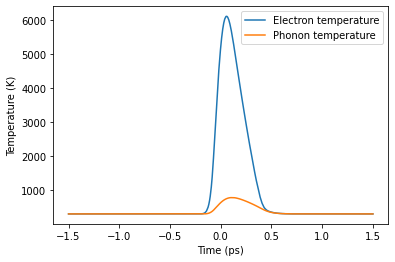

In [24]:
if bEnableY11 == 1:
    Graphing_TimeVSTemperature(Y11['Te'], Y11['Tp'])

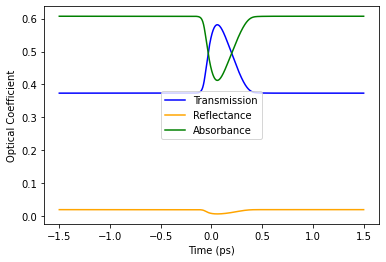

In [25]:
if bEnableY11 == 1:
    Graphing_TimeVSCoefficients(Y11['Te'], Y11['T'], Y11['R'], Y11['A'])

[Return to Index](#index)
<a id='y13'></a>
### Model Y-13: Temperature Dependent Drude Scattering Coefficient

In [26]:
if bEnableY13 == 1:
    Y.update({'Y2': 0})  #Electron Heat Capacity modification
    Y.update({'Y3': 0})  #Phonon Heat Capacity modification
    Y.update({'Y5': 0})  #Power function modification
    Y.update({'Y7': 0})  #Phonon relaxation modification
    Y.update({'Y11': 0}) #Phonon decay
    Y.update({'Y13': 1}) #Temperature dependent drude scattering coefficient 
    Y13 = y.Core(I, Relations_dict, Parameters, Y)

In [27]:
if bEnableY13 == 1:
    Graphing_TimeVSTemperature(Y13['Te'], Y13['Tp'])

In [28]:
if bEnableY13 == 1:
    Graphing_TimeVSCoefficients(Y13['Te'], Y13['T'], Y13['R'], Y13['A'])

[Return to Index](#index)
<a id='exp'></a>
### Experiment Data Processing

In [29]:
Experiment = np.genfromtxt(EXPERIMENT_PATH)
#Requires a different time_array as experimental data only has 301 data points.
exp_time_array = np.linspace(-1500e-15, 1500e-15, 301)
#Then interpolate from data to new data points so it can be plotted on graph with model.
#Other approach would be to reduce the model's data points to experiment.
Experiment_Interpolated = Interpolate(time_array, exp_time_array, Experiment)

# Final Processing

In [30]:
bEnableExperiment = 0
if bEnableExperiment == 1:
    GrandMax = max(Experiment_Interpolated)
    YEN = Normalizer(Experiment_Interpolated, time_points, GrandMax, min(Experiment_Interpolated))
    
    if bEnableY0 == 1:
        Y0N = Normalizer(Y0['T'], time_points, GrandMax, min(Y0['T']))
    if bEnableY2 == 1:
        Y2N = Normalizer(Y2['T'], time_points, GrandMax, min(Y2['T']))
    if bEnableY3 == 1:
        Y3N = Normalizer(Y3['T'], time_points, GrandMax, min(Y3['T']))
    if bEnableY5 == 1:
        Y5N = Normalizer(Y5['T'], time_points, GrandMax, min(Y5['T']))
    if bEnableY7 == 1:
        Y7N = Normalizer(Y7['T'], time_points, GrandMax, min(Y7['T']))
    if bEnableY11 == 1:
        Y11N = Normalizer(Y11['T'], time_points, GrandMax, min(Y11['T']))
else:
    if bEnableY0 == 1:
        Y0N = Y0['T']
    if bEnableY2 == 1:
        Y2N = Y2['T']
    if bEnableY3 == 1:
        Y3N = Y3['T']
    if bEnableY5 == 1:
        Y5N = Y5['T']
    if bEnableY7 == 1:
        Y7N = Y7['T']
    if bEnableY11 == 1:
        Y11N = Y11['T']
    if bEnableY13 == 1:
        Y13N = Y13['T']

[Return to Index](#index)
<a id='compare'></a>
## Model and Experiment Comparisons

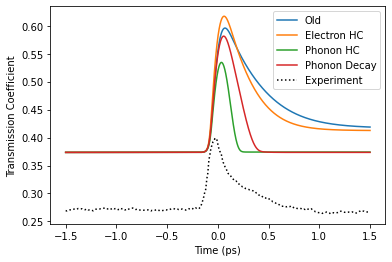

In [31]:
if bEnableY0 == 1:
    plt.plot(time_array/1e-12, Y0N, label="Old")
if bEnableY2 == 1:
    plt.plot(time_array/1e-12, Y2N, label="Electron HC")
if bEnableY3 == 1:
    plt.plot(time_array/1e-12, Y3N, label="Phonon HC")
if bEnableY5 == 1:
    plt.plot(time_array/1e-12, Y5N, label="Power")
if bEnableY7 == 1:
    plt.plot(time_array/1e-12, Y7N, label="Relaxation Coeff")
if bEnableY11 == 1:
    plt.plot(time_array/1e-12, Y11N, label="Phonon Decay")
if bEnableY13 == 1:
    plt.plot(time_array/1e-12, Y13N, label="Gamma")
bEnableExperiment = 1
if bEnableExperiment == 1:
    plt.plot(time_array/1e-12, Experiment_Interpolated, label="Experiment",linestyle="dotted", color="black")
    #plt.plot(time_array/1e-12, 1.4*Experiment_Interpolated, label="Experiment Scaled",linestyle="dotted", color="blue")

plt.xlabel("Time (ps)")
plt.ylabel("Transmission Coefficient")
#plt.axvline(0, color="red", linestyle="dotted")
plt.legend()